In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
tips_dataframe = sns.load_dataset("tips")

tips_dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [121]:
tips_dataframe.shape # 행과 열 개수

(244, 7)

In [122]:
tips_dataframe.dtypes # 데이터 타입

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [108]:
tips_dataframe.head(5) # 리스트 상위 5개

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
tips_dataframe.tail(5) # 리스트 하위 5개

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [123]:
tips_dataframe.describe() # 데이터 통계

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [129]:
tips_dataframe.sort_values(by='total_bill') # 계산금액 정렬

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [128]:
tips_dataframe.sort_values(by='tip') # 팁 금액 정렬

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [169]:
tips1 = tips_dataframe.sort_values(by='total_bill')[0:50]
print(f"결제금액 하위 50팀의 팁 평균 : {round(tips1['tip'].mean(), 2)}")

tips2 = tips_dataframe.sort_values(by='total_bill')[-50:]
print(f"결제금액 상위 50팀의 팁 평균 : {round(tips2['tip'].mean(), 2)}")

결제금액 하위 50팀의 팁 평균 : 1.88
결제금액 상위 50팀의 팁 평균 : 4.31


### 2.
계산 금액과 팁 금액 사이에 어떠한 상관 관계가 있을 것 같다. 두 변수의 관계를 시각화하여 나타내고, 선형적 관계가 보이는지 회귀선까지 그어서 표시해라.

In [38]:
tips_dataframe.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### 상관성 분석
우선 계산 금액과 팁 금액 사이의 상관성을 분석해보면 양수인 것을 보아 양의 선형관계를 가진다. 즉, 계산 금액이 클수록 팁 역시 클 것으로 예상된다.

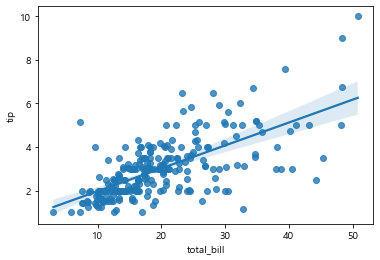

In [136]:
tips = sns.regplot(x='total_bill', y='tip', data=tips_dataframe)

#### 관계 시각화
회귀선만 보면 상관성 분석으로 예상했던 결과가 나타난다. 계산 금액과 팁 금액이 양의 선형관계를 가지므로 계산 금액이 클수록 팁도 클 것이라 예상하였는데, 회귀선 역시 같은 관계로 나타난다. 하지만 데이터 분포를 확인해보면 계산 금액이 크다고 해서 팁이 무조건 크다고 할 수는 없다. 데이터 분포를 보면 10을 결제한 손님의 팁이 40을 결제한 손님의 팁보다 큰 경우도 존재한다. 물론 이상치들의 값을 무시하면 안되지만, 이상치들이 모델을 크게 왜곡시키는 것은 아니므로 계산 금액과 팁은 양의 선형관계를 갖는 것이 맞다고 생각한다.

### 3.
요일별로 팁의 발생 횟수가 어떻게 다른지를 시각화해서 나타내어 보아라.

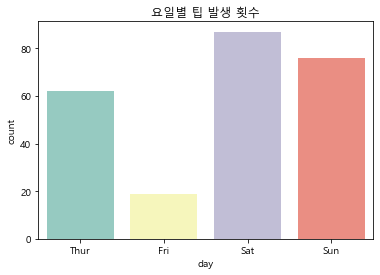

In [78]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

sns.countplot(x='day', data=tips_dataframe, palette='Set3')
plt.title("요일별 팁 발생 횟수")
plt.show()

팁 발생 횟수는 <strong>토요일, 일요일, 목요일, 금요일</strong> 순서대로 높다.

### 4.
요일별 계산금액의 통계적 분포를 한눈에 보고싶다. 시각화해서 나타내어 보아라.

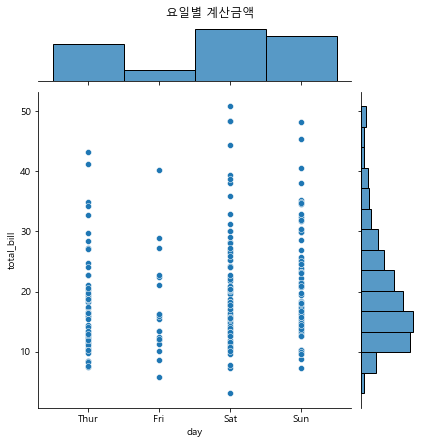

In [102]:
sns.jointplot(x='day',y='total_bill', data=tips_dataframe, palette='Set3')
plt.suptitle("요일별 계산금액", y=1.02)
plt.show()

### 5.
시간대, 요일, 테이블 인원수가 팁 금액과 어떠한 관계가 있는지 한눈에 알 수 있도록 시각화하라.

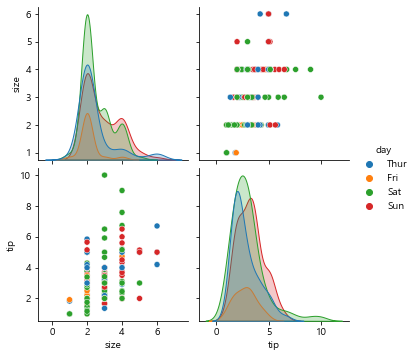

In [183]:
species = tips_dataframe[['day', 'time', 'size','tip']]
fig = sns.pairplot(species, hue='day')
fig

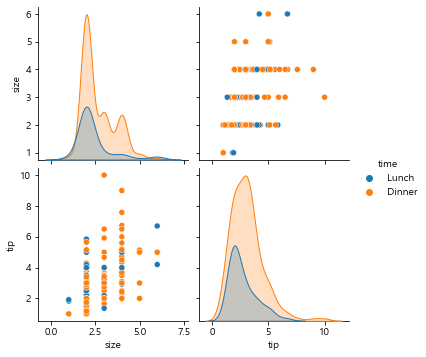

In [198]:
ndf = tips_dataframe[["size", "day", "tip", "time"]]
fig = sns.pairplot(ndf, hue='time')